In [1]:
# Importing the required libraries

!pip install torch
!pip install opencv-python
!pip install ultralytics
!pip install matplotlib

import zipfile
import os
import shutil
from ultralytics import YOLO
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import torchvision
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sns
from torchvision import transforms
from torchvision import datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch import flatten
import torch.optim as optim
import time
import torchvision.transforms as transforms
from PIL import Image
from IPython.display import display

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
# Setting the device name

if torch.cuda.is_available():
   device_name = torch.cuda.get_device_name(0)
   print("Device used : ", device_name)
   device = "cuda"
else:
   print("Device unavailable")
   device = "cpu"

Device used :  Tesla T4


In [80]:
# Defining the Dataset Path and extracting it to datasets folder

dataset_path = '/content/Real_world_traffic-signs_split.zip'
with zipfile.ZipFile(dataset_path, 'r') as zip_file:
     zip_file.extractall('/content/datasets')

In [81]:
# Moving the train, test and val folders to datasets folder

src_folder = '/content/datasets/Real_world_traffic-signs'
dest_folder = '/content/datasets'

folders = []

for sub_folder in os.listdir(src_folder):
    if os.path.isdir(os.path.join(src_folder, sub_folder)):
        folders.append(sub_folder)

for item in folders:
    source = os.path.join(src_folder, item)
    dest = os.path.join(dest_folder, item)
    shutil.move(source,dest)

In [83]:
# Defining and Training the YOLOv8 Model using Pre-trained weights

yolo_model = YOLO('yolov8s.pt')
results = yolo_model.train(data='data.yaml', epochs=15, imgsz=640, batch=16)

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

100%|██████████| 6.23M/6.23M [00:00<00:00, 70.7MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels.cache... 1369 images, 55 backgrounds, 0 corrupt: 100%|██████████| 1369/1369 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/val/labels.cache... 293 images, 17 backgrounds, 0 corrupt: 100%|██████████| 293/293 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000169, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      5.36G     0.8007       5.84     0.9852         23        640: 100%|██████████| 86/86 [00:33<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]

                   all        293        526      0.249      0.196      0.112     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      5.17G     0.7067      2.857     0.9504         23        640: 100%|██████████| 86/86 [00:31<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]


                   all        293        526      0.493      0.272      0.272      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      5.18G     0.7174      2.211     0.9484         24        640: 100%|██████████| 86/86 [00:30<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]


                   all        293        526      0.574      0.387       0.39      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      5.21G     0.6938      1.811     0.9492         18        640: 100%|██████████| 86/86 [00:32<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]


                   all        293        526      0.481      0.524      0.497      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      5.19G     0.6917      1.557     0.9351         18        640: 100%|██████████| 86/86 [00:31<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.99it/s]


                   all        293        526      0.576      0.521      0.538      0.454
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      5.21G     0.6347       1.38     0.9102         19        640: 100%|██████████| 86/86 [00:32<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.93it/s]

                   all        293        526      0.559      0.627      0.639      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      5.19G     0.6257      1.206     0.9072         15        640: 100%|██████████| 86/86 [00:29<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


                   all        293        526      0.601      0.614      0.648      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      5.22G     0.6156      1.077     0.9061         15        640: 100%|██████████| 86/86 [00:28<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.02it/s]


                   all        293        526       0.59      0.666      0.699      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      5.21G     0.6012     0.9756     0.9005         11        640: 100%|██████████| 86/86 [00:30<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.93it/s]

                   all        293        526      0.666      0.669      0.717      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15       5.2G     0.5904     0.8768     0.8902         21        640: 100%|██████████| 86/86 [00:28<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        293        526      0.767      0.615      0.743      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      5.19G     0.5807     0.8213     0.8883         19        640: 100%|██████████| 86/86 [00:28<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        293        526      0.674      0.717      0.764      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      5.21G     0.5731     0.7544     0.8841         12        640: 100%|██████████| 86/86 [00:29<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.01it/s]


                   all        293        526      0.754      0.703      0.774      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      5.21G       0.57     0.7277     0.8772         12        640: 100%|██████████| 86/86 [00:28<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]


                   all        293        526      0.727      0.699      0.781      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      5.18G     0.5636     0.6945     0.8768         13        640: 100%|██████████| 86/86 [00:28<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]

                   all        293        526      0.778      0.722      0.785      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15       5.2G     0.5524     0.6527     0.8779         18        640: 100%|██████████| 86/86 [00:28<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]

                   all        293        526      0.755      0.737      0.797       0.69



15 epochs completed in 0.153 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11146869 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


                   all        293        526      0.756      0.736      0.797       0.69
            forb_ahead        293         16      0.916      0.938      0.938      0.849
             forb_left        293         18      0.932      0.889      0.962      0.786
         forb_overtake        293          9      0.756          1      0.984      0.914
            forb_right        293         12      0.891          1      0.983      0.855
    forb_speed_over_10        293          4          0          0      0.241       0.22
   forb_speed_over_100        293          6      0.594          1      0.927      0.826
   forb_speed_over_130        293          6          1      0.301      0.498      0.438
    forb_speed_over_30        293         21      0.626      0.762      0.779      0.667
    forb_speed_over_40        293          4      0.556        0.5      0.637      0.573
     forb_speed_over_5        293          1      0.701          1      0.995      0.895
    forb_speed_over_5

In [84]:
# Defining YOLO model using the trained model path

yolo_model = YOLO("/content/runs/detect/train3/weights/last.pt")

# Saving the model weights

torch.save(yolo_model.state_dict(),"yolo_model.pth")

In [85]:
# Calculating IOU for detected and actual objects

def calculate_iou_bbox(bbox1,bbox2):

    x1 = torch.max(bbox1[0],bbox2[0])
    x2 = torch.min(bbox1[0]+bbox1[2], bbox2[0]+bbox2[2])
    y1 = torch.max(bbox1[1],bbox2[1])
    y2 = torch.min(bbox1[1]+bbox1[3], bbox2[1]+bbox2[3])

    t1 = torch.clamp(x2 - x1,min=0)
    t2 = torch.clamp(y2 - y1,min=0)

    area_of_intersection = t1 * t2
    area_of_union = (bbox1[2] * bbox1[3])+(bbox2[2] * bbox2[3]) - area_of_intersection
    iou = area_of_intersection / area_of_union

    return iou

In [86]:
# Finding the best match between predicted and actual boundary boxes based on IOU value

def finding_best_bbox_match(predicted_boxes,actual_boxes):

    best_bbox_match_idx = None
    maximum_iou = 0

    for idx1, bbox1 in enumerate(predicted_boxes):

        for idx2, bbox2 in enumerate(actual_boxes):
            cur_iou = calculate_iou_bbox(bbox1,bbox2)

            if cur_iou > maximum_iou:
                best_bbox_match_idx = (idx1, idx2)
                maximum_iou = cur_iou

    return best_bbox_match_idx, maximum_iou

In [87]:
# Compute loss, accuracy and map the actual classes of boundary boxes
# IOU is used as a metric to calculate accuracy and Smooth L1 loss is used as a metric to compute loss

def mapping_and_computing_loss_and_accuracy(predicted_boxes, actual_boxes, actual_class_values):

    best_bbox_match_loss = []
    best_bbox_match_accuracy = []
    best_bbox_match_pred = []
    best_bbox_match_actual = []
    mapped_actual_classes = []

    predicted_boxes = predicted_boxes.cpu()
    actual_boxes = actual_boxes.cpu()

    min_count = min(predicted_boxes.size(0),actual_boxes.size(0))

    for i in range(min_count):

        best_bbox_match_idx, maximum_iou = finding_best_bbox_match(predicted_boxes,actual_boxes)

        if best_bbox_match_idx is None:
           break

        else:

            predicted_box = predicted_boxes[best_bbox_match_idx[0]]
            actual_box = actual_boxes[best_bbox_match_idx[1]]

            loss = F.smooth_l1_loss(predicted_box, actual_box, reduction='sum')
            best_bbox_match_loss.append(loss.item())

            accuracy = maximum_iou.item()
            best_bbox_match_accuracy.append(accuracy)

            best_bbox_match_pred.append(predicted_box)
            best_bbox_match_actual.append(actual_box)

            if len(actual_class_values) > 0:
                mapped_actual_classes.append(actual_class_values[best_bbox_match_idx[1]])

            predicted_boxes = torch.cat((predicted_boxes[:best_bbox_match_idx[0]],predicted_boxes[best_bbox_match_idx[0] + 1:]), dim=0)
            actual_boxes = torch.cat((actual_boxes[:best_bbox_match_idx[1]],actual_boxes[best_bbox_match_idx[1] + 1:]), dim=0)

            if len(actual_class_values) > 0:
                del actual_class_values[best_bbox_match_idx[1]]

    return best_bbox_match_loss, best_bbox_match_accuracy, best_bbox_match_pred, best_bbox_match_actual, mapped_actual_classes

In [88]:
# Parse YOLO annotation file

def parse_yolo_annotation(annotation_path):

    bboxes = []
    classes = []

    with open(annotation_path, 'r') as file:
         lines = file.readlines()

    for l in lines:
        values = l.strip().split()
        classes.append(int(values[0]))
        x1, y1, w, h = map(float,values[1:])
        bboxes.append([x1, y1, w, h])

    return bboxes,classes

In [89]:
# Use YOLO to predict the testing data

cntr = 0
images_path = []
predicted_bboxes = []
predicted_classes = []
actual_bboxes = []
actual_classes = []

final_pred_bbox = []
final_actual_bbox = []
final_actual_classes = []
final_bbox_loss = []
final_bbox_accuracy = []

test_images = '/content/datasets/test/images'
test_annotations = '/content/datasets/test/labels'

test_image_files = os.listdir(test_images)
test_annotation_files = os.listdir(test_annotations)

test_image_files.sort()
test_annotation_files.sort()

for image_file, annotation_file in zip(test_image_files, test_annotation_files):

    image_path = os.path.join(test_images, image_file)
    annotation_path = os.path.join(test_annotations, annotation_file)

    images_path.append(image_path)

    image = cv2.imread(image_path)
    bboxes, classes = parse_yolo_annotation(annotation_path)

    results = yolo_model.predict(image_path, imgsz=640, conf=0.5, save=True)

    for r in results:
        predicted_bboxes.append(r.boxes.xywhn)

    actual_bboxes.append(torch.tensor(bboxes))
    actual_classes.append(classes)

    actual_boxes = actual_bboxes[cntr]
    predicted_boxes = predicted_bboxes[cntr]

    best_bbox_match_loss, best_bbox_match_accuracy, best_bbox_match_pred, best_bbox_match_actual, mapped_actual_classes = mapping_and_computing_loss_and_accuracy(predicted_boxes, actual_boxes,actual_classes[cntr])

    final_pred_bbox.append(best_bbox_match_pred)
    final_actual_bbox.append(best_bbox_match_actual)

    final_actual_classes.append(mapped_actual_classes)
    final_bbox_accuracy.append(best_bbox_match_accuracy)
    final_bbox_loss.append(best_bbox_match_loss)

    cntr+=1



image 1/1 /content/datasets/test/images/AUTO_COLLECTED_PICTURE_102_png.rf.d41ec30b5e991c5d4d9e9644c5698a05.jpg: 640x640 2 info_parkings, 16.5ms
Speed: 1.6ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/datasets/test/images/AUTO_COLLECTED_PICTURE_135_png.rf.06465ab107bf20158a53f1ee84888846.jpg: 640x640 1 info_crosswalk, 1 info_parking, 1 warn_cyclists, 16.6ms
Speed: 1.6ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/datasets/test/images/AUTO_COLLECTED_PICTURE_159_png.rf.955fc653a5ceb9f69ef526305e087aa6.jpg: 640x640 2 forb_stoppings, 16.6ms
Speed: 1.6ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/datasets/test/images/AUTO_COLLECTED_PICTURE_164_png.rf.e23b26f9179e6c55042b8042c7859c0e.jpg: 640x640 1 fo

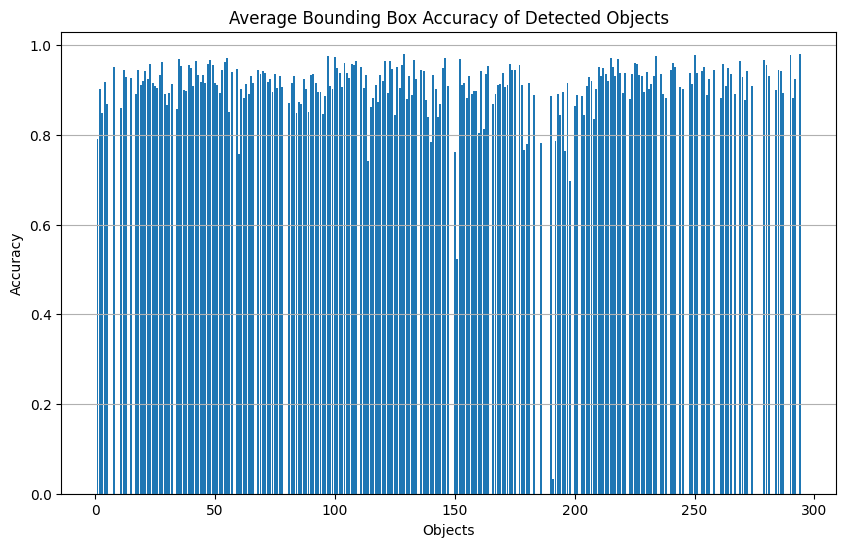

In [12]:
# Distribution of Detected object's accuracy

average_obj_accuracies = [np.mean(obj_acc) if obj_acc else np.nan for obj_acc in final_bbox_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(range(1,len(average_obj_accuracies)+ 1), average_obj_accuracies)
plt.title("Average Bounding Box Accuracy of Detected Objects")
plt.xlabel("Objects")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.show()

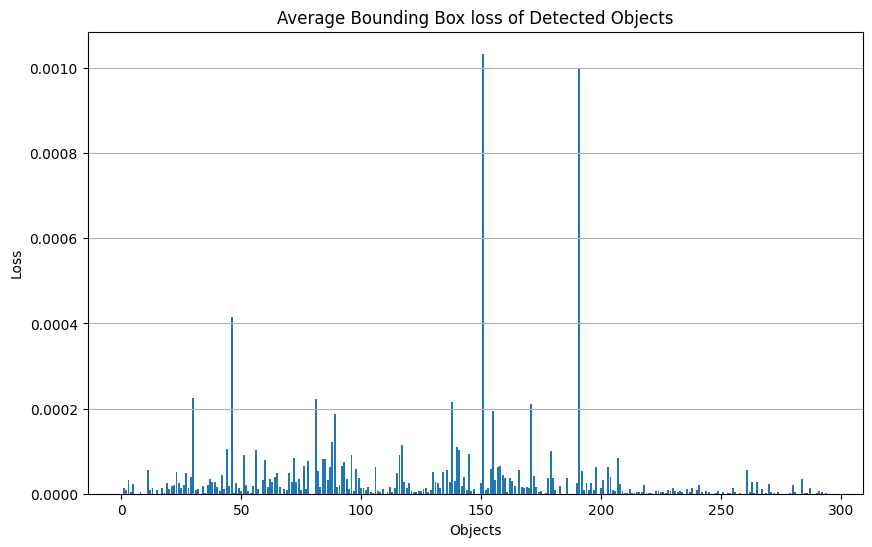

In [13]:
# Distribution of Detected object's loss

average_obj_losses = [np.mean(obj_loss) if obj_loss else np.nan for obj_loss in final_bbox_loss]

plt.figure(figsize=(10, 6))
plt.bar(range(1,len(average_obj_losses)+ 1), average_obj_losses)
plt.title("Average Bounding Box loss of Detected Objects")
plt.xlabel("Objects")
plt.ylabel("Loss")
plt.grid(axis='y')
plt.show()

In [90]:
# Save the Detected objects

cropped_images = []

cropped_images_folder = "/content/cropped_images_after_yolo"

if not os.path.exists(cropped_images_folder):
   os.makedirs(cropped_images_folder)

for i, (image_path, bboxes) in enumerate(zip(images_path, final_pred_bbox)):

    image = cv2.imread(image_path)
    image_name, _ = os.path.splitext(os.path.basename(image_path))

    for j,bbox in enumerate(bboxes):

        x, y, w, h = map(float, bbox.tolist())
        x1 = int((x - w / 2) * image.shape[1])
        y1 = int((y - h / 2) * image.shape[0])
        x2 = int((x + w / 2) * image.shape[1])
        y2 = int((y + h / 2) * image.shape[0])

        roi = image[y1:y2,x1:x2]
        if roi.size == 0:
           continue

        output_path = os.path.join(cropped_images_folder, f"{image_name}_object_{j}.jpg")
        cropped_images.append(output_path)
        cv2.imwrite(output_path, roi)

In [91]:
# Defining the transformations applied in classifier models

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((40,40)),
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))
])

In [103]:
# Transforming the cropped images and storing it as tensors

image_tensors = []

for image_path in cropped_images:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image_tensor = transform(image)
    image_tensors.append(image_tensor)
print("Each image is of shape : ", image_tensors[0].shape)

Each image is of shape :  torch.Size([3, 40, 40])


# **Vision Transformer X Resnet Concatenator Model**

In [45]:
# Resnet 34 model which returns the embedding dimension
import torch
import torch.nn as nn

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        return out

class ResNet34(nn.Module):
    def __init__(self, num_classes=169):
        super(ResNet34, self).__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.block2 = self._make_layer(64, 64, 3)
        self.block3 = self._make_layer(64, 128, 4, stride=2)
        self.block4 = self._make_layer(128, 256, 6, stride=2)
        self.block5 = self._make_layer(256, 512, 3, stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride, downsample))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

resnet_model_con = ResNet34().to(device)

# Vision Transformer Model - This model returns the embedding dimension

class VisionTransformer_Model(nn.Module):
    def __init__(self, in_channels, img_size,embedding_dim, num_attention_heads, patch_size, num_layers):
        super(VisionTransformer_Model, self).__init__()

        self.patch_embedding = nn.Sequential(
            nn.Conv2d(in_channels, embedding_dim , kernel_size=patch_size, stride=patch_size),
            nn.BatchNorm2d(embedding_dim),
            nn.Flatten(2)
        )

        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=num_attention_heads), num_layers = num_layers
        )

    def forward(self, x):
        x = self.patch_embedding(x)
        x = self.encoder(x)
        x = x.mean(dim=1)
        return x

in_channels = 3
img_size = 40
embedding_dim_vision = 13 * 13
num_attention_heads = 13
patch_size = 3
num_layers = 12

vit_model_con = VisionTransformer_Model(in_channels, img_size,embedding_dim_vision, num_attention_heads, patch_size, num_layers).to(device)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [46]:
# Concatenated Vision Transformer and Resnet Model

class VisionTransformer_ResNet_Concatenator(nn.Module):
    def __init__(self, vision_model, resnet_model, conv1d_out_channels, num_classes):
        super(VisionTransformer_ResNet_Concatenator, self).__init__()
        self.vision_model = vision_model
        self.resnet_model = resnet_model
        self.conv1d_out_channels = conv1d_out_channels
        with torch.no_grad():
            resnet_output_dim = resnet_model(torch.zeros(1, 3, 40, 40).to(device)).shape[1]
            vit_output_dim = vision_model(torch.zeros(1, 3, 40, 40).to(device)).shape[1]
        self.concat_dim = vit_output_dim + resnet_output_dim
        self.conv1d = nn.Conv1d(self.concat_dim, conv1d_out_channels, kernel_size=1)
        self.fc = nn.Linear(conv1d_out_channels, num_classes)

    def forward(self, x):
        vit_output = self.vision_model(x)
        resnet_output = self.resnet_model(x)
        concatenated_output = torch.cat((vit_output, resnet_output), dim=1)
        concatenated_output = concatenated_output.unsqueeze(2)
        concatenated_output = concatenated_output.permute(0, 1, 2)
        conv1d_output = self.conv1d(concatenated_output)
        conv1d_output = conv1d_output.squeeze(2)
        output = self.fc(conv1d_output)
        return output

num_classes = 55
conv1d_out_channels = 128

vit_resnet_model = VisionTransformer_ResNet_Concatenator(vit_model_con, resnet_model_con, conv1d_out_channels, num_classes).to(device)
vit_resnet_model_path = "vit_resnet_model.pth"
vit_resnet_model.load_state_dict(torch.load(vit_resnet_model_path))
vit_resnet_model.eval()

VisionTransformer_ResNet_Concatenator(
  (vision_model): VisionTransformer_Model(
    (patch_embedding): Sequential(
      (0): Conv2d(3, 169, kernel_size=(3, 3), stride=(3, 3))
      (1): BatchNorm2d(169, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Flatten(start_dim=2, end_dim=-1)
    )
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-11): 12 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=169, out_features=169, bias=True)
          )
          (linear1): Linear(in_features=169, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=169, bias=True)
          (norm1): LayerNorm((169,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((169,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (drop

In [47]:
# Classify the objects using classifier

final_actual_classes_flat = []
final_actual_classes_tensor = []

final_actual_classes_flat = [i for sublist in final_actual_classes for i in sublist]
final_actual_classes_tensor = [torch.tensor(i) for i in final_actual_classes_flat]

predictions = []
criterion = nn.CrossEntropyLoss()
num_classes = 55

image_tensors_cpy = [tensor.to(device) for tensor in image_tensors]

for i in range(len(image_tensors_cpy)):
    with torch.no_grad():
        outputs = vit_resnet_model(image_tensors_cpy[i].unsqueeze(0)).to(device)
        Prob = nn.Softmax(dim=1)(outputs)
        Y_pred = Prob.argmax(1).int()
        predictions.append(Y_pred.item())

correct_predictions = sum(1 for i, j in zip(predictions,final_actual_classes_tensor) if i == j)
class_accuracy = (correct_predictions/len(predictions)) * 100

print(f'Accuracy of the ViT X Resnet classifier on the test images: {class_accuracy:.2f}%')

Accuracy of the ViT X Resnet classifier on the test images: 95.62%


In [48]:
final_bbox_accuracy_flat = [i for sublist in final_bbox_accuracy for i in sublist]
obj_det_accuracy = sum(final_bbox_accuracy_flat) / len(final_bbox_accuracy_flat) * 100

final_bbox_loss_flat = [i for sublist in final_bbox_loss for i in sublist]
obj_det_loss = sum(final_bbox_loss_flat) / len(final_bbox_loss_flat)

print(f'Accuracy of the YOLOv8 Object detection model on the test images: {obj_det_accuracy:.2f}%')
print(f'Average loss of the YOLOv8 Object detection model on the test images: {obj_det_loss}')

Accuracy of the YOLOv8 Object detection model on the test images: 90.75%
Average loss of the YOLOv8 Object detection model on the test images: 3.417283455052364e-05


In [49]:
alpha = 0.5
vit_resnet_final_accuracy = (alpha * obj_det_accuracy) + ((1-alpha) * class_accuracy)

print(f'Overall accuracy on the test images: {vit_resnet_final_accuracy:.2f}%')

Overall accuracy on the test images: 93.19%


In [50]:
Y_pred = predictions
Y_test = final_actual_classes_flat

precision, recall, f1, support = precision_recall_fscore_support(Y_test, Y_pred)

print("Performance Metrics:")
print(f"Accuracy      : {vit_resnet_final_accuracy:.2f} %")
print(f"Precision     : {precision}")
print(f"Recall        : {recall}")
print(f"F1 Score      : {f1}")

Performance Metrics:
Accuracy      : 93.19 %
Precision     : [          1           1           1           1           1        0.75     0.95455           1           1     0.63636           1           1           1           1           1           1     0.88889           1           1     0.93939           1           1           1           1        0.25           1
           1           1           1           1           1           0           1           1           1           1     0.83333           1     0.94118           1           1        0.75           1           0           1           1           1           1           1]
Recall        : [          1           1           1           1           1           1           1           1           1       0.875           1     0.88889     0.66667         0.5           1           1           1           1     0.85714     0.96875           1           1     0.92857           1           1           1
           1       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


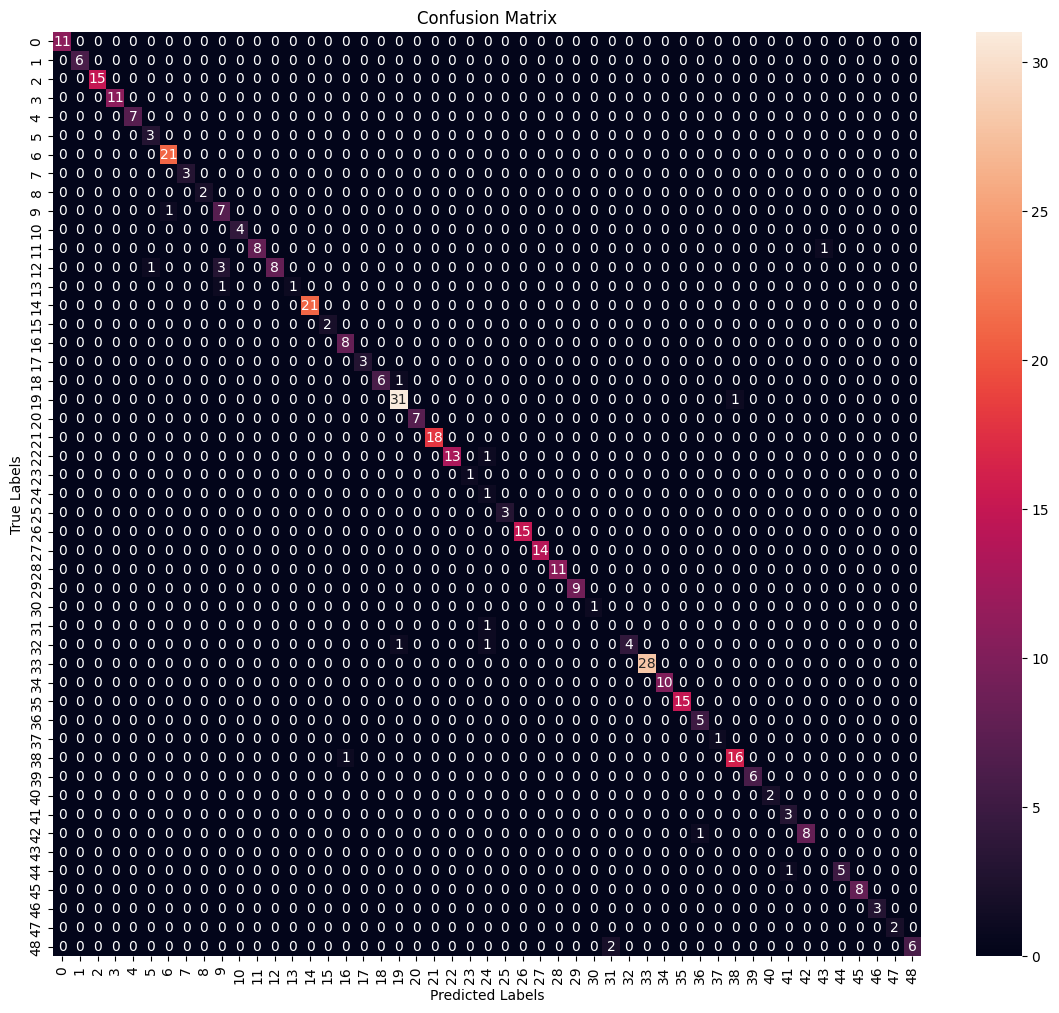

In [51]:
cmat = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(cmat, annot=True, fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

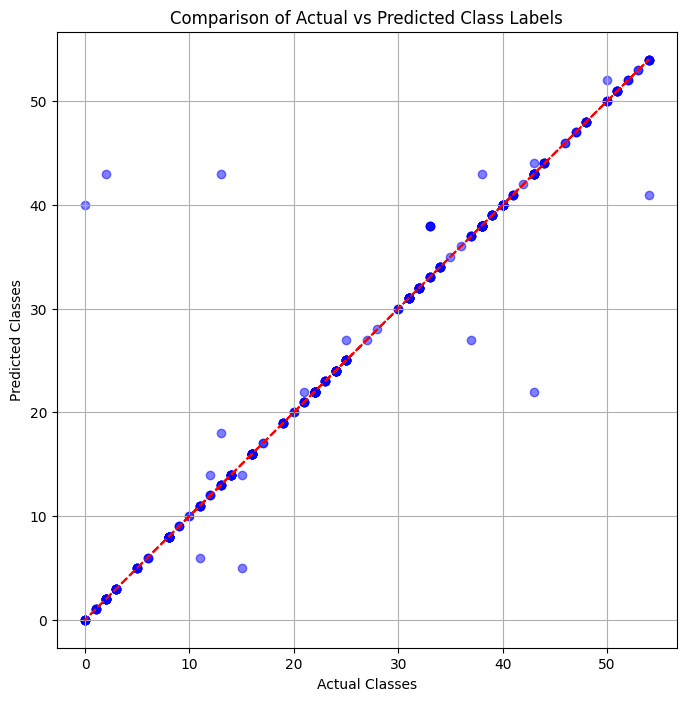

In [ ]:
# Plot to compare the actual and predicted classes

plt.figure(figsize=(8, 8))
plt.scatter(final_actual_classes_flat, predictions, color='blue', alpha=0.5)
plt.plot(final_actual_classes_flat, final_actual_classes_flat, color='red', linestyle='--')
plt.xlabel('Actual Classes')
plt.ylabel('Predicted Classes')
plt.title('Comparison of Actual vs Predicted Class Labels')
plt.grid(True)
plt.show()

In [ ]:
# References

# CSE 574 - Introduction to Machine Learning Assignment 2 from Sneha Talapala, Dhanush Babu Ramadoss, Kishore Nithin Sridhar
# CSE 676 - Deep Learning Assignment 0, 1, 2 from Sneha Talapala, Dhanush Babu Ramadoss, Kishore Nithin Sridhar
# https://docs.ultralytics.com/
# https://arxiv.org/abs/2010.11929